<a href="https://colab.research.google.com/github/andy-j-block/lymphoma_classifier/blob/master/get_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data Import

In [1]:
from PIL import Image
import os
from os.path import abspath
import numpy as np
import pandas as pd
import random
import pickle

In [13]:
def running_hosted():

    if 'content' in os.getcwd():
        hosted = True
      
    else:
        hosted = False
        %autosave 120
    
    if hosted:
       print(f'This notebook is running hosted') 
    
    else:
        print(f'This notebook is running locally\nAutosave is set to 120 seconds')

    return hosted

############

def colab_setup():

    %cd -q /content/
    
    #check if git clone already performed
    if not os.path.isdir('./lymphoma_classifier'):
        !git clone https://github.com/andy-j-block/lymphoma_classifier.git
        
    %cd -q /content/lymphoma_classifier
    current_dir = os.getcwd()
    print(f"Current directory is '{current_dir}'")


############      

def load_images(images_main_dir):
    
    # get cancer type strings
    cancer_types = [type_ for type_ in os.listdir(images_main_dir)]

    # get directories where images are stored
    image_dirs = [os.path.join(images_main_dir, type_) for type_ in cancer_types]
    
    # read images into a list
    images = []

    for i, image_dir in enumerate(image_dirs):       
        image_files = os.listdir(image_dir)
        
        for j in image_files:

            # pass thru all the image files per image directory, read the image,
            # add it to the images list
            image_file = os.path.join(image_dirs[i], j)
            image = Image.open(image_file)
            rbg_array = np.asarray(image)        
            images.append((cancer_types[i], image, rbg_array, image_file))
                
    return cancer_types, image_dirs, images

###Local or hosted runtime

I like to use Google Colab for its hosted runtime features so I include a check to see if the notebook is being run locally or hosted.

In [11]:
hosted = running_hosted()

This notebook is running hosted


In [14]:
if hosted:
    colab_setup()

Current directory is '/content/lymphoma_classifier'


Fetching the latest version of albumentations library if running on hosted machine

In [5]:
if hosted:
    !pip install albumentations --upgrade

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 37.6MB 75kB/s 
     |████████████████████████████████| 952kB 25.8MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


###Data import and image preview

Import the images and store them in a data structure

Cancer types are ['CLL', 'MCL', 'FL']
First image path: ./Images/CLL/sj-03-476_006.tif
First cancer type: CLL
First RGB array: [[[131 107 130]
  [128 107 132]
  [122  97 125]
  ...
  [169 185 180]
  [178 181 181]
  [161 155 158]]

 [[133 107 126]
  [131 107 130]
  [125  97 125]
  ...
  [167 185 179]
  [176 181 181]
  [168 155 158]]

 [[144 118 136]
  [144 118 138]
  [133 104 128]
  ...
  [170 190 183]
  [178 185 186]
  [172 165 172]]

 ...

 [[114  83 110]
  [106  83 112]
  [102  78 110]
  ...
  [176 149 159]
  [171 136 151]
  [139 103 121]]

 [[110  82 110]
  [105  82 108]
  [109  82 107]
  ...
  [178 144 155]
  [163 126 145]
  [141 101 121]]

 [[114  82 112]
  [101  82 112]
  [106  80 102]
  ...
  [172 140 149]
  [153 116 134]
  [129  97 126]]]
First image:



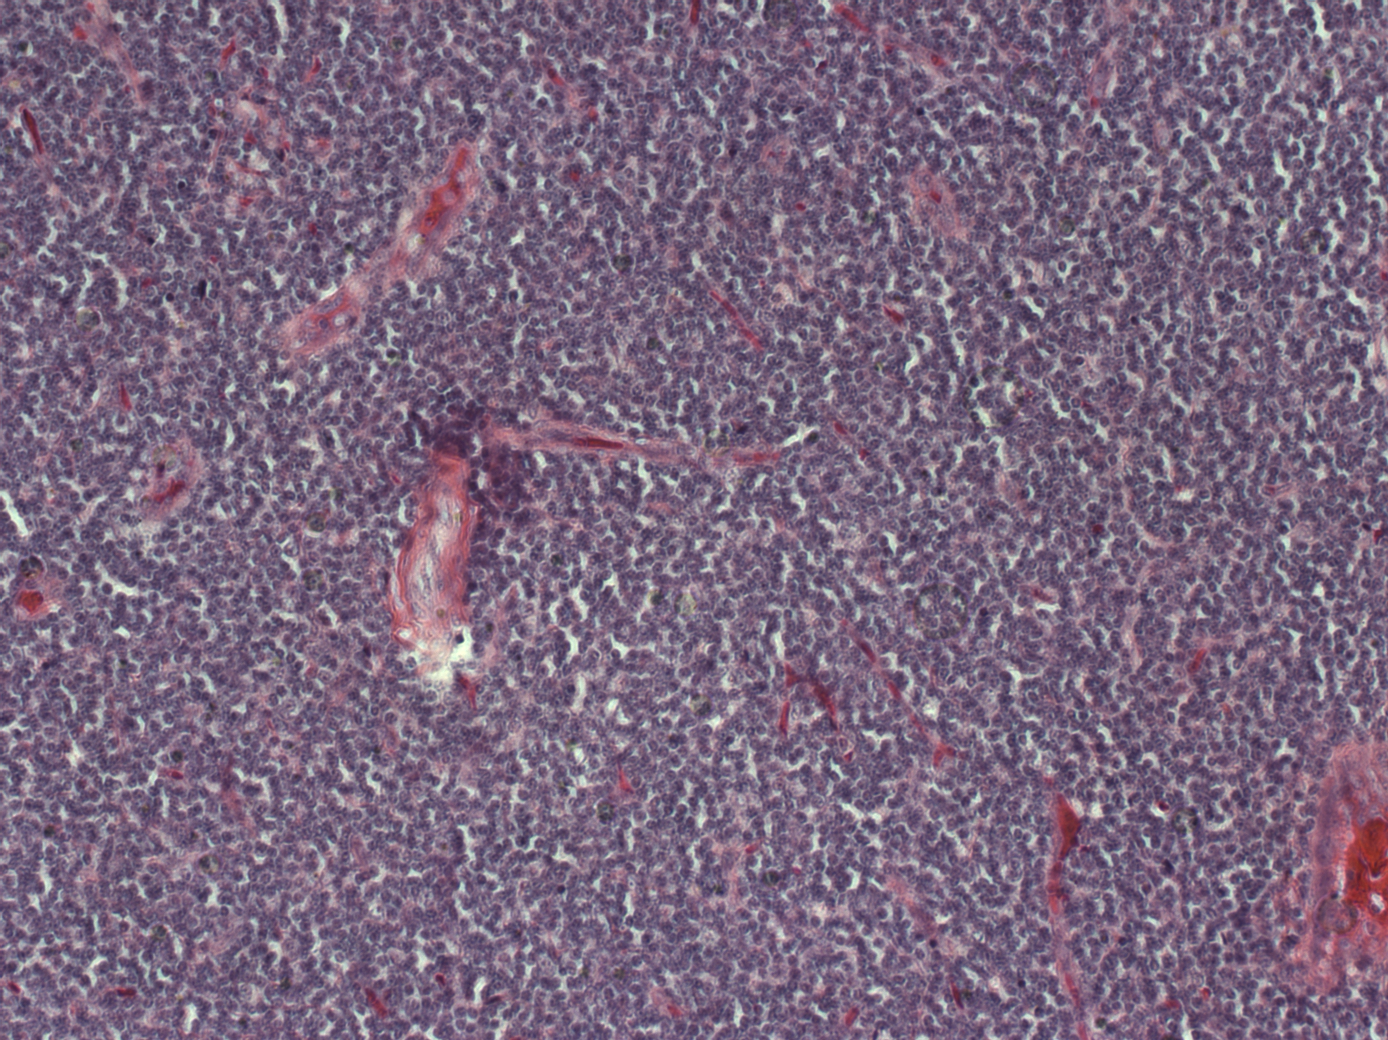

In [6]:
cancer_types, image_dirs, images = load_images('./Images')
print(f'Cancer types are {cancer_types}')
print(f'First image path: {images[0][3]}\nFirst cancer type: {images[0][0]}\nFirst RGB array: {images[0][2]}\nFirst image:\n')
images[0][1]

###Create DataFrame

In [7]:
df = pd.DataFrame(images, columns=['cancer_type', 'image', 'rgb_array', 'image_path'])
df.head(3)

,cancer_type,image,rgb_array,image_path
0,CLL,<PIL.TiffImagePlugin.TiffImageFile image mode=...,"[[[131, 107, 130], [128, 107, 132], [122, 97, ...",./Images/CLL/sj-03-476_006.tif
1,CLL,<PIL.TiffImagePlugin.TiffImageFile image mode=...,"[[[133, 106, 130], [139, 106, 126], [153, 121,...",./Images/CLL/sj-03-852-R2_010.tif
2,CLL,<PIL.TiffImagePlugin.TiffImageFile image mode=...,"[[[132, 83, 114], [138, 83, 116], [149, 93, 12...",./Images/CLL/sj-03-852-R2_012.tif


### Pickle the dataframe

In [ ]:
if not os.path.exists('./dataframe.pkl'):
    df.to_pickle('./dataframe.pkl')